In [18]:
from typing import Optional, Union, Dict, List

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Import data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0M/22.0M [00:03<00:00, 6.36MB/s]

Extracting files...


Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [4]:
# Loader source - https://www.kaggle.com/code/hojjatk/read-mnist-dataset

import os
import random
import struct
from array import array

# MNIST Data Loader Class
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = np.zeros((size, 28, 28))
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i] = img
        
        return images, np.array(labels)

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


# Helper function to show a list of images with their relating titles
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


In [5]:
# Set file paths based on added MNIST Datasets

training_images_filepath = os.path.join(path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = os.path.join(path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath =     os.path.join(path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath =     os.path.join(path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

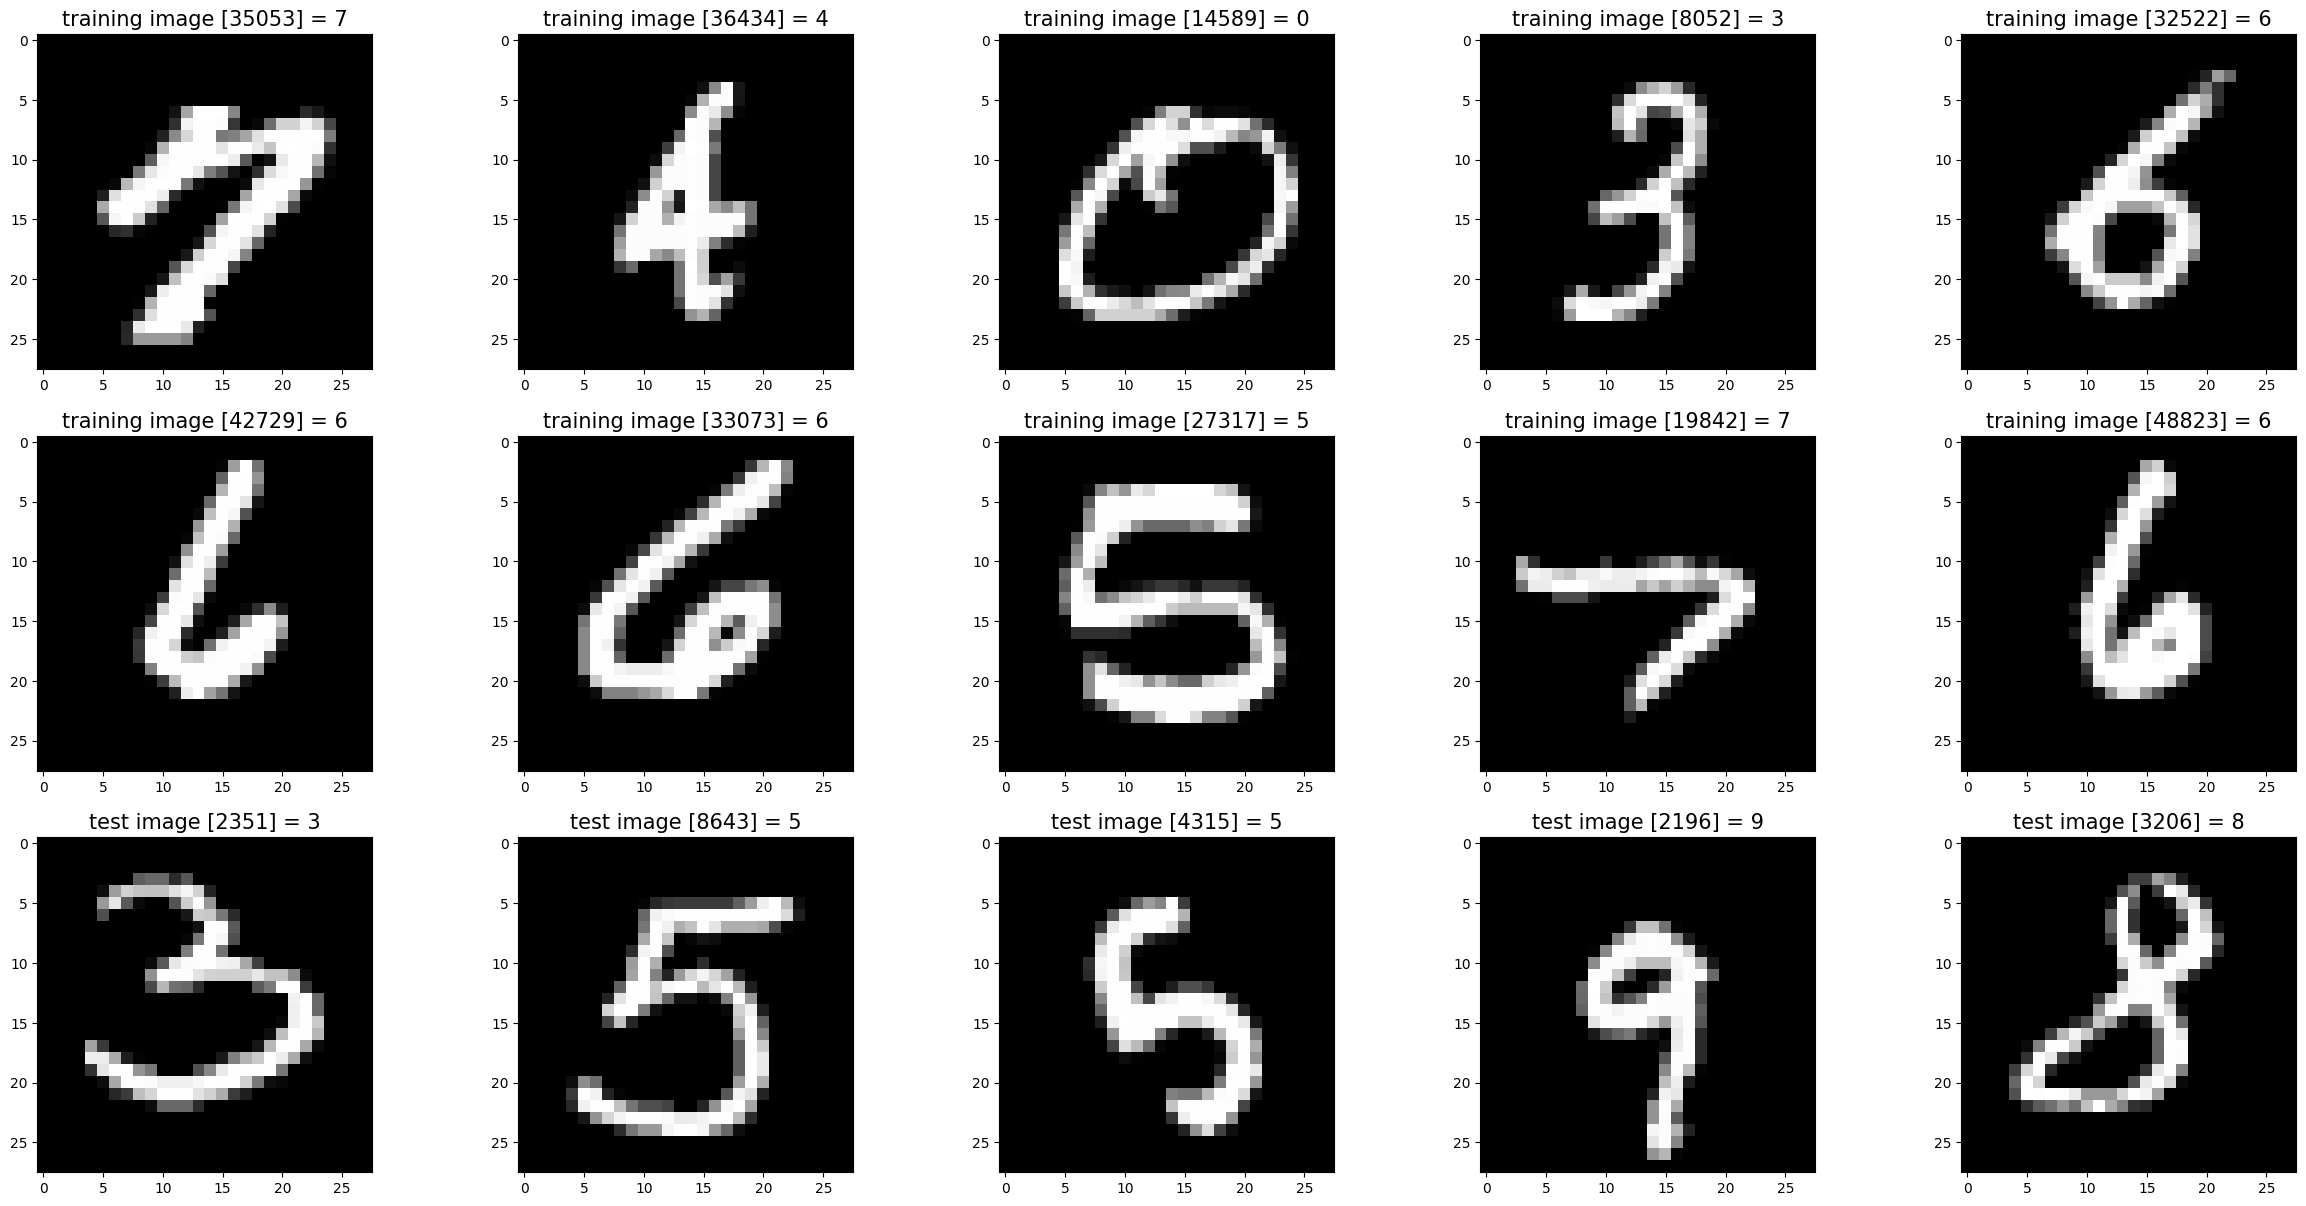

In [6]:
# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(X_train, y_train), (X_test, y_test) = mnist_dataloader.load_data()


# Show some random training and test images 
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(X_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(X_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

# Check data

## Create T-SNE projection

In [7]:
data = np.concatenate((X_train, X_test))
data.shape

(70000, 28, 28)

In [8]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
data.shape

(70000, 784)

In [9]:
tsne = TSNE(n_jobs=-1, verbose=1)
projected_data = tsne.fit_transform(data)

projected_data.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.007s...
[t-SNE] Computed neighbors for 70000 samples in 42.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sa

(70000, 2)

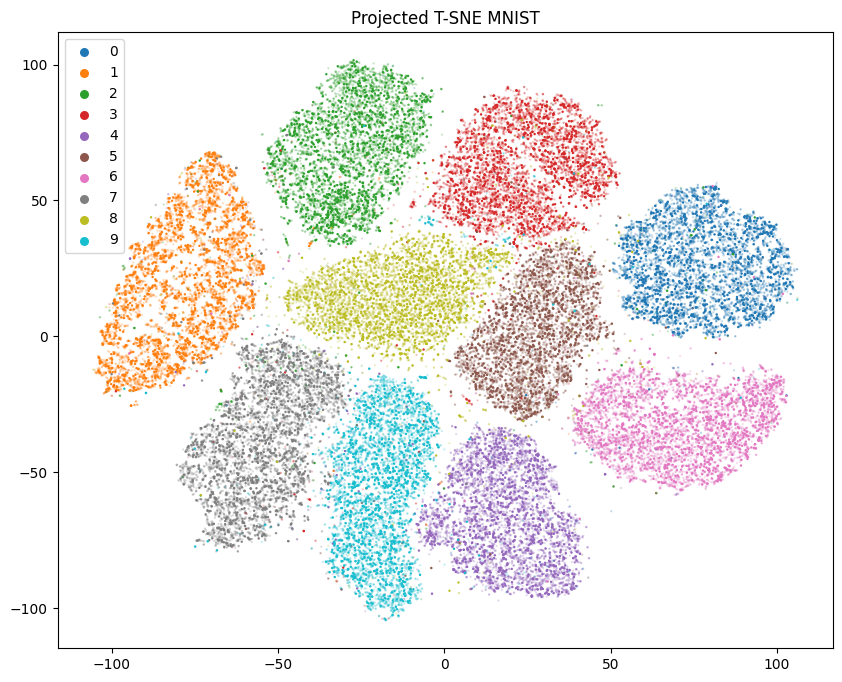

In [14]:
classes = np.concatenate((y_train, y_test))

plt.figure(figsize=(10, 8))

all_inds = np.arange(data.shape[0])

for i in np.unique(classes):
    inds = classes == i
    alpha = np.where(all_inds[inds] < X_train.shape[0], 0.2, 1.0) # 0.5 alpha for train, 1 for test
    plt.scatter(
        projected_data[inds][:, 0],
        projected_data[inds][:, 1],
        s=0.5,
        label=str(i),
        alpha=alpha
    )

lgnd = plt.legend()
for i in range(len(lgnd.legend_handles)):
    lgnd.legend_handles[i]._alpha = 1
    lgnd.legend_handles[i]._sizes = [30]

plt.title(f"Projected T-SNE MNIST")
plt.savefig(f"MNIST_projected_data_TSNE.png")
plt.show()

# Preprocess data

In [16]:
# Preprocess data, convert to 0,1 pixels values
def preprocess_mnist(X: np.ndarray) -> np.ndarray:
    X = X / 255.
    X = np.where(X < 0.5, 0., 1.)
    return X

X_train = preprocess_mnist(X_train)
X_test = preprocess_mnist(X_test)

In [19]:
# Split train to train and validation (90%/10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1, 
    random_state=15,
    stratify=y_train
)

In [207]:
# Add dimension
X_train, X_val, X_test = X_train[:, np.newaxis], X_val[:, np.newaxis], X_test[:, np.newaxis]

In [208]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (54000, 1, 28, 28)
Val shape: (6000, 1, 28, 28)
Test shape: (10000, 1, 28, 28)


# Modeling

## Common (utils)

In [21]:
def get_object(types_dict: Dict[str, type], obj: Union[str, object], base_type: type, default: str):
    if obj is None or isinstance(obj, str):
        obj = obj or default
        return types_dict[obj.lower()]()
    elif isinstance(obj, base_type):
        return obj
    else:
        raise RuntimeError(f"Param should be an instance of base {base_type}, string or None")

## Activation functions

In [22]:
# Base abstract Activation class

class Activation:
    NAME = None

    def call(self, x):
        raise NotImplementedError("Call not impelemted")

    def derivative(self, out):
        raise NotImplementedError("Derivative not impelemted")

    def __call__(self, x):
        return self.call(x)

    def __str__(self):
        return self.NAME

In [23]:
class Linear(Activation):
    NAME = "linear"

    def call(self, x):
        return x

    def derivative(self, out):
        return 1

In [319]:
class Sigmoid(Activation):
    NAME = "sigmoid"

    def __init__(self, clip_limit: Optional[Union[int, float]] = 250):
        self.clip_limit = -clip_limit if clip_limit is not None and clip_limit < 0 else clip_limit

    def call(self, x):
        x = np.clip(x, -self.clip_limit, self.clip_limit) if self.clip_limit else x
        return 1 / (1 + np.exp(-x))

    def derivative(self, out):
        return out * (1 - out)

In [320]:
class Tanh(Activation):
    NAME = "tanh"

    # @njit(cache=True,fastmath=True)
    def call(self, x):
        return np.tanh(x)

    def derivative(self, out):
        return 1. - out**2

In [33]:
class ReLU(Activation):
    NAME = 'relu'
    
    def call(self, x):
        return np.maximum(0, x)
    
    def derivative(self, out):
        return (out > 0).astype(float)

In [29]:
class SiLU(Activation):
    NAME = "silu"
    
    def __init__(self, clip_limit: Optional[Union[int, float]] = 250):
        self.sigmoid = Sigmoid(clip_limit)
        self.x_sigm = None    # bhee

    def call(self, x):
        self.x_sigm = self.sigmoid(x)
        return x * self.x_sigm

    def derivative(self, out):
        return self.x_sigm * (1. - out) + out

In [195]:
class StableSoftmax(Activation):
    """More numerically stable softmax implementation"""
    NAME = 'stable_softmax'

    def call(self, x):
        """Numerically stable softmax"""
        stable_x = x - np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(stable_x)
        return exp_x / (np.sum(exp_x, axis=-1, keepdims=True) + 1e-8)

    def derivative(self, out):
        return out

In [30]:
# Find all classes based on Activation class
ACTIVATIONS = {
    v.NAME: v 
    for v in globals().values() 
    if isinstance(v, type) and Activation in v.__bases__
}

print(ACTIVATIONS)

{'linear': <class '__main__.Linear'>, 'sigmoid': <class '__main__.Sigmoid'>, 'tanh': <class '__main__.Tanh'>, 'silu': <class '__main__.SiLU'>}


## Layers

In [178]:
from uuid import uuid4

In [179]:
class BaseLayer:
    def __init__(self, input_size, output_size, activation='linear'):
        self.input_size = input_size
        self.output_size = output_size
        self.activation = get_object(ACTIVATIONS, activation, base_type=Activation, default='linear')
        # Train params
        self.weights = None
        self.bias = None
        self.init_weights()
        
        self.name = str(uuid4())

    def init_weights(self):
        raise NotImplementedError("Init weights not impelemted")

    @property
    def num_params(self):
        raise NotImplementedError("Number of parameters not impelemted")

    def forward(self, X):
        raise NotImplementedError("Forward not impelemted")

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    def backward(self, X, output, doutput):
        raise NotImplementedError("Backward not impelemted")

In [180]:
class Dense(BaseLayer):
    def init_weights(self):
        self.weights = np.random.normal(
            scale=2./(self.input_size + self.output_size), 
            size=(self.input_size, self.output_size)
        )
        self.bias = np.random.normal(
            scale=2/(self.input_size + self.output_size), 
            size=(1, self.output_size)
        )

    @property
    def num_params(self):
        return (self.input_size + 1) * self.output_size
    
    def forward(self, X):
        output = np.dot(X, self.weights) + self.bias
        output = self.activation(output)

        return output

    def __call__(self, X):
        return self.forward(X)

    def backward(self, X, output, doutput):
        # Activation function gradient
        doutput = doutput * self.activation.derivative(output)
        # Next grdients calculation
        dinput = np.dot(doutput, self.weights.T)
        dweights = np.dot(X.T, doutput)
        dbias = np.sum(doutput, axis=0, keepdims=True)

        return dinput, {"weights": dweights, "bias": dbias}

In [181]:
class Base2DLayer(BaseLayer):
    def __init__(self, input_size, output_channels, window_size, stride=None, padding=0, activation='linear'):
        # input_size: (channels, height, width)
        self.input_size = input_size
        self.input_channels, self.input_height, self.input_width = input_size

        self.window_size = window_size if isinstance(window_size, tuple) else (window_size, window_size)
        self.stride = stride if isinstance(stride, tuple) else (stride, stride)
        self.padding = padding if isinstance(padding, tuple) else (padding, padding)

        # Calculate output dimensions
        self.output_channels = output_channels
        self.output_height = (self.input_height + 2 * self.padding[0] - self.window_size[0]) // self.stride[0] + 1
        self.output_width = (self.input_width + 2 * self.padding[1] - self.window_size[1]) // self.stride[1] + 1
        self.output_size = (self.output_channels, self.output_height, self.output_width)

        # Initialize base class
        super().__init__(self.input_size, self.output_size, activation)

    def _pad_input(self, X):
        """Apply padding to input"""
        if self.padding[0] == 0 and self.padding[1] == 0:
            return X
            
        return np.pad(X, 
            (
                (0, 0), (0, 0), # Batch and channels without pad
                (self.padding[0], self.padding[0]),
                (self.padding[1], self.padding[1]) 
            ), 
            mode='constant'
        )

    def _get_receptive_field_borders(self, i, j):
        h_start = i * self.stride[0]
        h_end = h_start + self.window_size[0]
        w_start = j * self.stride[1]
        w_end = w_start + self.window_size[1]
        return (h_start, w_start), (h_end, w_end)

    def _window_slide(self, X):
        X_padded = self._pad_input(X)

        # Slide through image
        for i in range(self.output_height):
            for j in range(self.output_width):
                # Extract receptive field
                (h_start, w_start), (h_end, w_end) = self._get_receptive_field_borders(i, j)
                receptive_field = X_padded[:, :, h_start:h_end, w_start:w_end]
                yield i, j, receptive_field

In [247]:
class Conv2D(Base2DLayer):
    def __init__(self, input_size, output_channels, kernel_size, stride=1, padding=0, activation='linear'):
        super().__init__(input_size, output_channels, kernel_size, stride, padding, activation)

        self.kernel_size = self.window_size
    
    def init_weights(self):
        # He initialization
        kernel_params = self.window_size[0] * self.window_size[1]
        scale = np.sqrt(2.0/ (self.input_channels * kernel_params))

        self.weights = np.random.normal(
            scale=scale,
            size=(
                self.output_channels, 
                self.input_channels, 
                *self.window_size
            )
        )
        self.bias = np.random.normal(scale=scale, size=self.output_channels)

    @property
    def num_params(self):
        weights_params = np.prod(self.weights.shape)
        bias_params = self.output_channels
        return weights_params + bias_params

    
    def forward(self, X):
        """
        Forward pass for Conv2D
        X shape: (batch_size, input_channels, input_height, input_width)
        Returns: (batch_size, output_channels, output_height, output_width)
        """
        # Initialize output
        output = np.zeros((X.shape[0], *self.output_size))

        for i, j, receptive_field in self._window_slide(X):
            # Convolve with all filters
            for k in range(self.output_channels):
                # Element-wise multiplication and sum
                output[:, k, i, j] = np.sum(
                    receptive_field * self.weights[k, np.newaxis], 
                    axis=(1, 2, 3)
                ) + self.bias[k]
    
        output = self.activation(output)
        
        return output


    def backward(self, X, output, doutput):
        """
        Backward pass for Conv2D
        X: Previous input to the layer 
        output: Output from forward pass (after activation)
        doutput: Gradient from next layer
        Returns: dinput and dict to update weights
        """
        # Gradient through activation
        doutput = doutput * self.activation.derivative(output)

        # Initialize gradients
        dinput = np.zeros_like(self._pad_input(X))
        dweights = np.zeros_like(self.weights)
        dbias = np.zeros_like(self.bias)
        
        for i, j, receptive_field in self._window_slide(X):
            for k in range(self.output_channels):
                # Gradients for input
                (h_start, w_start), (h_end, w_end) = self._get_receptive_field_borders(i, j)
                dinput[:, :, h_start:h_end, w_start:w_end] += (
                     doutput[:, k:k+1, i:i+1, j:j+1] * self.weights[k]
                )
    
                # Weights gradients
                dweights[k] += np.sum(
                    receptive_field * doutput[:, k:k+1, i:i+1, j:j+1], # Save axis
                    axis=0
                )
            dbias += np.sum(doutput[:, :, i, j], axis=0)

        # Average gradients over batch
        dweights /= X.shape[0]
        dbias /= X.shape[0]

        # Remove padding from dinput gradient
        if self.padding[0] > 0 and self.padding[1] > 0:
            dinput = dinput[:, :, self.padding[0]:-self.padding[0], self.padding[1]:-self.padding[1]]
        elif self.padding[0] > 0:
            dinput = dinput[:, :, self.padding[0]:-self.padding[0], :]
        elif self.padding[1] > 0:
            dinput = dinput[:, :, :, self.padding[1]:-self.padding[1]]

        return dinput, {"weights": dweights, "bias": dbias}

In [230]:
class MaxPool2D(Base2DLayer):
    def __init__(self, input_size, pool_size=2, stride=None, padding=0):
        """
        Max Pooling 2D Layer
        
        Args:
            pool_size: int or tuple, size of the pooling window
            stride: int or tuple, stride of the pooling operation. If None, defaults to pool_size
            padding: int or tuple, padding to apply to input
        """
        super().__init__(input_size, input_size[0], pool_size, stride or pool_size, padding)

        self.pool_size = self.window_size        
        # Store for backward pass
        self.max_indices = None
        self._window_chan_inds = np.array(
            np.unravel_index(
                np.arange(self.output_channels * np.prod(self.pool_size)), 
                shape=(self.output_channels, *self.pool_size)
            )
        )

    def init_weights(self):
        """Pooling layer have no trainable parameters"""
        pass

    @property
    def num_params(self):
        """Pooling layer have no trainable parameters"""
        return 0

    def forward(self, X):
        """
        Forward pass for MaxPool2D
        
        Args:
            X: input data with shape: (batch_size, channels, height, width)
        Returns: 
            output with shape (batch_size, channels, output_height, output_width)
        """
        batch_size = X.shape[0]

        # Initialize output
        output = np.zeros((batch_size, self.output_channels, self.output_height, self.output_width))
        
        # Store indices of max values for backward pass
        
        self.max_indices = np.zeros((*output.shape, 2), dtype=int)
        
        for i, j, window in self._window_slide(X):
            maxes = np.max(window, axis=(2, 3), keepdims=True)
            output[:, :, i, j] = maxes.reshape((batch_size, self.output_channels))
            
            # Save max indices
            mask = (window == maxes).reshape((batch_size, np.prod(window.shape[1:])))
        
            for b in range(batch_size):
                sample_indices = self._window_chan_inds[:, mask[b]] # [[channel indexes], [row indexes], [col indexes]]
                self.max_indices[b, sample_indices[0], i, j, 0] = sample_indices[1] + i * self.stride[0]
                self.max_indices[b, sample_indices[0], i, j, 1] = sample_indices[2] + j * self.stride[1]

        return output

    def backward(self, X, output, doutput):
        """
        Backward pass for MaxPool2D
        
        Args:
            X: Previous input to the layer 
            output: Output from forward pass (after activation), not used
            doutput: Gradient from next layer        
        Returns:
            dinput: Input gradient, shape (batch_size, channels, input_height, input_width)
        """
        if self.max_indices is None:
            output = self.forward(X)

        batch_size = X.shape[0]
        
        # Initialize gradient with respect to input (padded)
        dinput = np.zeros_like(self._pad_input(X))

        # Distribute gradients only to positions that were selected during max pooling
        # TODO rewrite
        for b in range(batch_size):
            for c in range(self.output_channels):
                for i in range(self.output_height):
                    for j in range(self.output_width):
                        h_idx, w_idx = self.max_indices[b, c, i, j]
                        dinput[b, c, h_idx, w_idx] += doutput[b, c, i, j]

        # Remove padding from gradient
        if self.padding[0] > 0 and self.padding[1] > 0:
            dinput = dinput[:, :, self.padding[0]:-self.padding[0], self.padding[1]:-self.padding[1]]
        elif self.padding[0] > 0:
            dinput = dinput[:, :, self.padding[0]:-self.padding[0], :]
        elif self.padding[1] > 0:
            dinput = dinput[:, :, :, self.padding[1]:-self.padding[1]]
    
        return dinput, {}

    def __call__(self, X):
        return self.forward(X)

In [243]:
class Flatten(BaseLayer):
    def init_weights(self):
        """Flatten layer have no trainable parameters"""
        pass

    @property
    def num_params(self):
        """Flatten layer have no trainable parameters"""
        return 0

    def forward(self, X):
        return X.reshape((X.shape[0], self.output_size))

    def backward(self, X, output, doutput):
        input_size = self.input_size if isinstance(self.input_size, tuple) else (self.input_size,)
        dinput = doutput.reshape((doutput.shape[0], *input_size))
        return dinput, {}

## other

In [154]:
a = [
        [
            [ [1, 2], [3, 4] ],
            [ [0, 9], [5, -1] ]
        ],
        [
            [ [10, 9], [2, 1] ],
            [ [0, 9], [5, -1] ]
        ]
]
a = np.array(a)
maxes = np.max(a, axis=(2, 3), keepdims=True)
mask = maxes == a
mask = mask.reshape((a.shape[0], np.prod(a.shape[1:])))
inds = np.array(np.unravel_index(np.arange(np.prod(a.shape[1:])), a.shape[1:]))

i, j = 0, 0
batch_size = 2
max_indices = np.zeros((batch_size, 2, 1, 1, 2))

for b in range(batch_size):
    mi = inds[:, mask[b]]
    max_indices[b, mi[0], i, j, 0] = mi[1]
    max_indices[b, mi[0], i, j, 1] = mi[2]
    
    # a[i, mi[0], mi[1], mi[2]] # For sample i (in batch), for each channel for cuurent window
max_indices

array([[[[[1., 1.]]],


        [[[0., 1.]]]],



       [[[[0., 0.]]],


        [[[0., 1.]]]]])

In [316]:
mask

array([[False, False, False,  True, False,  True, False, False],
       [ True, False, False, False, False,  True, False, False]])

In [317]:
inds

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [318]:
inds[:, mask[0]]

array([[0, 1],
       [1, 0],
       [1, 1]])

In [118]:
max_indices = max_indices.astype(int)

In [112]:
dX_padded = np.arange(np.prod(a.shape)).reshape(a.shape)

In [113]:
dX_padded.shape

(2, 2, 2, 2)

In [114]:
dX_padded

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]]])

In [98]:
max_indices[:, :, 0, 0].shape

(2, 2, 2)

In [102]:
max_indices[0, 0, 0, 0, 0]

np.float64(1.0)

In [121]:
max_indices[:, 0, 0, 0, 0].astype(int)

array([1, 0])

In [133]:
max_indices[:, 0, 0, 0]

array([[1, 1],
       [0, 0]])

In [144]:
max_indices

array([[[[[1, 1]]],


        [[[0, 1]]]],



       [[[[0, 0]]],


        [[[0, 1]]]]])

In [142]:
dX_padded[0, 0, max_indices[0, 0, 0, 0, 0], max_indices[0, 0, 0, 0, 1]]

np.int64(3)

In [151]:
dX_padded.shape

(2, 2, 2, 2)

In [153]:
max_indices.shape

(2, 2, 1, 1, 2)

In [ ]:
# need max_indexes in format (4 (dims), batch_size, channels, , )

In [152]:
xinds = np.indices(dX_padded.shape)

for j1 in range(2): # batch_size
    for j2 in range(2): # channels
        for j3 in range(2): # num winds in height
            for j4 in range(2): # num winds in width
                print(dX_padded[
                    xinds[0][j1][j2][j3][j4],
                    xinds[1][j1][j2][j3][j4],
                    xinds[2][j1][j2][j3][j4],
                    xinds[3][j1][j2][j3][j4]
                ])
                    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [87]:
np.add.at(dX_padded, max_indices[:, :, 0, 0], 10)
dX_padded

IndexError: arrays used as indices must be of integer (or boolean) type

In [69]:
inds[:, np.newaxis, :][:, mask]

IndexError: boolean index did not match indexed array along axis 1; size of axis is 1 but size of corresponding boolean axis is 2

In [82]:
inds[:, mask[0]]

array([[0, 1],
       [1, 0],
       [1, 1]])

## Optimizers

In [186]:
class BaseOptimizer:
    NAME = None

    def apply_gradients(self, layer: BaseLayer, grads: Dict[str, np.array]):
        for _weights_name, _weights_grad in grads.items():
            weights = getattr(layer, _weights_name, None)
            if weights is None:
                continue
            setattr(
                layer, _weights_name, 
                self._grad_step("_".join([layer.name, _weights_name]), weights, _weights_grad)
            )

    def _grad_step(self, layer_name: str, weights, grads):
        raise NotImplementedError("Applying gradients not impelemted")

In [189]:
class SimpleOptimizer(BaseOptimizer):
    NAME = "simple"

    def __init__(self, learning_rate: float = 1e-4):
        self.lr = learning_rate

    def _grad_step(self, layer_name: str, weights, grads):
        return weights - self.lr * grads

In [187]:
class MomentumOptimizer(BaseOptimizer):
    NAME = "momentum"

    def __init__(self, learning_rate: float = 1e-4, momentum_betta: float = 0.5):
        self.lr = learning_rate
        self.betta = momentum_betta
        self.prev_grads = {}

    def _grad_step(self, layer_name: str, weights, grads):
        if layer_name in self.prev_grads:
            self.prev_grads[layer_name] = self.prev_grads[layer_name] * self.betta + self.lr * (1 - self.betta) * grads
        else:
            self.prev_grads[layer_name] = self.lr * grads
        return weights - self.prev_grads[layer_name]

In [190]:
# Find all classes based on Activation class
OPTIMIZERS = {
    v.NAME: v 
    for v in globals().values() 
    if isinstance(v, type) and BaseOptimizer in v.__bases__
}

print(OPTIMIZERS)

{'simple': <class '__main__.SimpleOptimizer'>, 'momentum': <class '__main__.MomentumOptimizer'>}


## Losses

In [196]:
class BaseLoss:
    NAME = None

    def __init__(self):
        self.history = []
        self.val_history = []
        self.epoch_loss = None
        self.epoch_batch_cnt = 0

    def calc(self, y_true, y_pred):
        raise NotImplementedError("Loss calc not impelemted")

    def derivative(self, y_true, y_pred):
        raise NotImplementedError("Loss derivative not impelemted")

    def batch_loss(self):
        if self.epoch_loss is not None and self.epoch_batch_cnt > 0:
            return self.epoch_loss / self.epoch_batch_cnt
        return None

    def _update_history(self):
        batch_loss = self.batch_loss()
        if batch_loss is not None:
            self.history.append(batch_loss)

    def start_epoch(self):
        self._update_history()
        self.epoch_loss = 0
        self.epoch_batch_cnt = 0

    def update_epoch(self, y_true, y_pred):
        loss = self.calc(y_true, y_pred)
        self.epoch_loss += loss
        self.epoch_batch_cnt += 1

    def end_epoch(self):
        self._update_history()
        self.epoch_loss = None
        self.epoch_batch_cnt = 0

    def val_loss(self, y_true, y_pred):
        loss = self.calc(y_true, y_pred)
        self.val_history.append(loss)
        return loss

    def __call__(self, y_true, y_pred):
        return self.calc(y_true, y_pred)

In [197]:
class MSE(BaseLoss):
    NAME = 'mse'

    def calc(self, y_true, y_pred):
        return np.mean((y_pred - y_true) ** 2)

    def derivative(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / y_true.shape[0]

In [234]:
class SoftmaxCrossEntropy(BaseLoss):
    NAME = 'softmax_cross_entropy'

    def __init__(self, reduction='mean'):
        super().__init__()

        self.reduction = reduction
        self.softmax = StableSoftmax()

    def _one_hot(self, y_true, num_classes: int):
        if y_true.ndim == 1 or (y_true.ndim == 2 and y_true.shape[1] == 1):
            y_true_one_hot = np.eye(num_classes)[y_true.astype(int).flatten()]
        else:
            y_true_one_hot = y_true
        return y_true_one_hot

    def calc(self, y_true, y_pred):
        """
        Forward pass with logits (before softmax)
        Args:
            y_pred: Logits (before softmax) of shape (batch_size, num_classes)
            y_true: True labels
        """        
        # Apply softmax
        y_pred = self.softmax(y_pred)
        y_true_one_hot = self._one_hot(y_true, num_classes=y_pred.shape[1])
   
        # Compute cross entropy loss
        losses = -np.sum(y_true_one_hot * np.log(y_pred + 1e-8), axis=1)
        
        if self.reduction == 'mean':
            return np.mean(losses)
        elif self.reduction == 'sum':
            return np.sum(losses)
        else:
            return losses
    
    def derivative(self, y_true, y_pred):
        """Backward pass - more numerically stable"""
        # Convert labels to one-hot
        y_true_one_hot = self._one_hot(y_true, num_classes=y_pred.shape[1])
        y_pred = self.softmax(y_pred)
        
        # Gradient: dL/dlogits = y_pred - y_true
        batch_size = y_pred.shape[0]
        doutput = (y_pred - y_true_one_hot) / batch_size

        return doutput

In [221]:
# Find all classes based on Activation class
LOSSES = {
    v.NAME: v 
    for v in globals().values() 
    if isinstance(v, type) and BaseLoss in v.__bases__
}

print(LOSSES)

{'mse': <class '__main__.MSE'>, 'softmax_cross_entropy': <class '__main__.SoftmaxCrossEntropy'>}


## Model

In [256]:
import time

class Model:
    def __init__(self, layers: Optional[List[BaseLayer]] = None):
        self.layers = layers or []

        self.epoch = None
        self.verbose = 1

    def add(self, layer):
        self.layers.append(layer)
    
    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def compile(self, loss='mse', optimizer='simple'):            
        self.loss = get_object(LOSSES, loss, base_type=BaseLoss, default='mse')
        self.optimizer = get_object(OPTIMIZERS, optimizer, base_type=BaseOptimizer, default='simple')

    def _train_iter(self, layer_input, y, layer_ind: int = 0):
        if layer_ind >= len(self.layers):
            y_pred = layer_input
            self.loss.update_epoch(y, y_pred)
            dloss = self.loss.derivative(y, y_pred)
            return dloss

        layer_forward_start_time = time.time()
        layer = self.layers[layer_ind]
        output = layer(layer_input)
        layer_forward_end_time = time.time()
        # Next layer process
        doutput = self._train_iter(output, y, layer_ind + 1)
        # Backward step
        layer_backward_start_time = time.time()
        dinput, updates = layer.backward(layer_input, output, doutput)
        # Otimizer apply gradients
        self.optimizer.apply_gradients(layer, updates)
        layer_backward_end_time = time.time()

        #print(f"Layer[{layer.name}] - forward {layer_forward_end_time - layer_forward_start_time:.3f}," \
        #      f"backward {layer_backward_end_time - layer_backward_start_time:.3f}")
        
        return dinput

    def train_step(self, X, y, batch_size):
        n_batches = int(np.ceil(X.shape[0] / batch_size))

        for batch in range(n_batches):
            # Get mini-batch
            batch_st, batch_end = batch * batch_size, (batch + 1) * batch_size
            X_batch, y_batch = X[batch_st:batch_end], y[batch_st:batch_end]
            # Train iteration
            self._train_iter(X_batch, y_batch)

            if self.verbose > 0:
                print(f"\rBatch {batch + 1}/{n_batches}, Loss: {self.loss.batch_loss():.4f}", end="")

    def fit(self, X, y, X_val=None, y_val=None, epochs=100, batch_size=32, verbose=1):
        self.verbose = verbose or 0
        n_samples = X.shape[0]

        for epoch in range(epochs):
            self.epoch = epoch
            # Shuffle data
            # indices = np.random.permutation(n_samples)
            # X_shuffled, y_shuffled = X[indices], y[indices]

            self.loss.start_epoch()
            self.train_step(X, y, batch_size)
            self.loss.end_epoch()

            if X_val is not None and y_val is not None:
                val_loss = self.loss.val_loss(y_val, self.predict(X_val))
            else:
                val_loss = None
    
            if self.verbose > 0:
                val_str = "" if val_loss is None else f", Val. Loss: {val_loss:.4f}"
                print(f"\rEpoch {self.epoch + 1}/{epochs}, Epoch Loss: {self.loss.history[-1]:.4f}{val_str}")

        if X_val is not None and y_val is not None:
            return self.loss.history, self.loss.val_history
        else:
            return self.loss.history

    def predict(self, X):
        return self.forward(X)

    def summary(self):
        # Collect info
        info = [ # Header
            ["Layer", "Input size", "Output size", "Num params", "Activation"]
        ]
        info_len = list(map(len, info[0]))
        for layer in self.layers:
            layer_info = (
                layer.__class__.__name__, 
                layer.input_size,
                layer.output_size,
                layer.num_params,
                layer.activation,
            )
            layer_info = list(map(str, layer_info))
            info.append(layer_info)
            
            layer_lens = list(map(len, layer_info))
            info_len = [max(_prev, _new) for _prev, _new in zip(info_len, layer_lens)]
        # Print info
        def _print_dash_line():
            print("+", end="")
            for _len in info_len:
                print("-" * (_len + 2), end="+")
            print()

        print("Model summary")
        _print_dash_line()
        for row_ind, row_info in enumerate(info):
            print("| ", end="")
            for field, field_len in zip(row_info, info_len):
                print(field.ljust(field_len), end=" | ")
            print()
            if row_ind == 0 or row_ind == len(info) - 1:
                _print_dash_line()

## Metrics

In [292]:
def plot_hist(train_history, val_history=None):
    plt.plot(train_history, c='b', label="Train")
    if val_history is not None:
        plt.plot(val_history, c='r', label="Validation")
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [303]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, numpy: bool = False):
    classes = np.unique(y_true)

    results = [
        [
            np.sum((y_pred == i) & (y_true == j))
            for j in classes
        ]
        for i in classes
    ]
    if numpy:
        return np.array(results)

    return pd.DataFrame(
        results, 
        columns=pd.MultiIndex.from_tuples(
            [("Actual", str(i)) for i in classes]
        ),
        index=pd.MultiIndex.from_tuples(
            [("Predict", str(i)) for i in classes]
        )
    )

def precision_score(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred, numpy=True)
    total = np.sum(conf_matrix, axis=1)
    return np.diagonal(conf_matrix) / total

def recall_score(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred, numpy=True)
    total = np.sum(conf_matrix, axis=0)
    return np.diagonal(conf_matrix) / total

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)

In [310]:
from scipy.integrate import trapezoid

def auc(fpr, tpr):
    area = trapezoid(tpr, fpr)
    return float(area)

def roc_curve(y_true, y_score):
    y_true = y_true == 1

    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    tps = np.cumsum(y_true, dtype=np.float64)[threshold_idxs]
    fps = 1 + threshold_idxs - tps
    
    fpr = fps / fps[-1]
    tpr = tps / tps[-1]
    return auc(fpr, tpr), fpr, tpr

def roc_curve_multiclass(y_true, y_score):
    results = {}
    for cls in sorted(np.unique(y_true)):
        bin_y_true = (y_true == cls).astype(int)
        bin_y_score = y_score[:, cls]
        auc, fpr, tpr = roc_curve(bin_y_true, bin_y_score)
        results[cls] = (auc, fpr, tpr)
    return results

In [307]:
def get_predict_classes(y_pred):
    softmax = StableSoftmax()
    return np.argmax(softmax(y_pred), axis=1)

def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = get_predict_classes(y_pred)

    accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
    print("Metrics by classes")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: " + "; ".join([f'{p:.4f}' for p in precision]))
    print(f"Recall: " + "; ".join([f'{r:.4f}' for r in recall]))
    print(f"F1-Score: " + "; ".join([f'{f:.4f}' for f in f1]))

    return confusion_matrix(y_test, y_pred)

# Training

In [287]:
# Hyperparams

LEARNING_RATE = 1e-2
MOMENTUM_BETTA = 0.5

In [288]:
# Create model with all hidden layers
model = Model([
    Conv2D((1, 28, 28), 8, kernel_size=3, stride=1, padding=1, activation='silu'),
    MaxPool2D((8, 28, 28), pool_size=2, padding=0),
    # Conv2D((8, 14, 14), 16, kernel_size=3, stride=1, padding=1, activation='silu'),
    # MaxPool2D((16, 14, 14), pool_size=2, padding=0),
    # Conv2D((16, 7, 7), 32, kernel_size=3, stride=1, padding=1, activation='silu'),
    Flatten((8, 14, 14), 1568),
    Dense(1568, 256, activation='silu'),
    Dense(256, 64, activation='silu'),
    Dense(64, 10) # No activation, apply softmax later
])

model.summary()

Model summary
+-----------+-------------+-------------+------------+------------+
| Layer     | Input size  | Output size | Num params | Activation | 
+-----------+-------------+-------------+------------+------------+
| Conv2D    | (1, 28, 28) | (8, 28, 28) | 80         | silu       | 
| MaxPool2D | (8, 28, 28) | (8, 14, 14) | 0          | linear     | 
| Flatten   | (8, 14, 14) | 1568        | 0          | linear     | 
| Dense     | 1568        | 256         | 401664     | silu       | 
| Dense     | 256         | 64          | 16448      | silu       | 
| Dense     | 64          | 10          | 650        | linear     | 
+-----------+-------------+-------------+------------+------------+


In [289]:
# Set loss and optimizer
model.compile(
    loss=SoftmaxCrossEntropy(reduction='mean'),
    optimizer=MomentumOptimizer(learning_rate=LEARNING_RATE, momentum_betta=MOMENTUM_BETTA)
)

In [290]:
train_history, val_history = model.fit(
    X_train, y_train, 
    X_val, y_val,
    epochs=100,
    batch_size=64
)

Epoch 1/100, Epoch Loss: 2.3015, Val. Loss: 2.3000
Epoch 2/100, Epoch Loss: 2.2977, Val. Loss: 2.2930
Epoch 3/100, Epoch Loss: 2.1811, Val. Loss: 1.8150
Epoch 4/100, Epoch Loss: 1.1899, Val. Loss: 0.6890
Epoch 5/100, Epoch Loss: 0.5647, Val. Loss: 0.4677
Epoch 6/100, Epoch Loss: 0.4356, Val. Loss: 0.3901
Epoch 7/100, Epoch Loss: 0.3712, Val. Loss: 0.3458
Epoch 8/100, Epoch Loss: 0.3306, Val. Loss: 0.3174
Epoch 9/100, Epoch Loss: 0.3013, Val. Loss: 0.2948
Epoch 10/100, Epoch Loss: 0.2768, Val. Loss: 0.2746
Epoch 11/100, Epoch Loss: 0.2548, Val. Loss: 0.2562
Epoch 12/100, Epoch Loss: 0.2350, Val. Loss: 0.2395
Epoch 13/100, Epoch Loss: 0.2172, Val. Loss: 0.2247
Epoch 14/100, Epoch Loss: 0.2016, Val. Loss: 0.2119
Batch 10/844, Loss: 0.1897

KeyboardInterrupt: 

# Model metrics

In [297]:
train_history = model.loss.history
val_history = model.loss.val_history

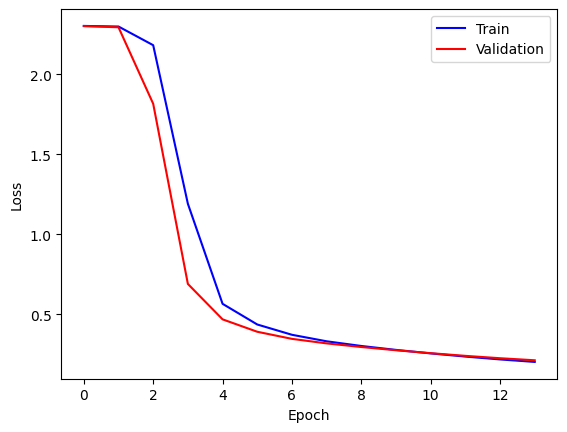

In [298]:
plot_hist(train_history, val_history)

In [308]:
# Eval model on test
evaluate_model(model, X_test, y_test)

Metrics by classes
Accuracy: 0.9452
Precision: 0.9545; 0.9772; 0.9599; 0.9363; 0.9379; 0.8958; 0.9657; 0.9648; 0.9140; 0.9400
Recall: 0.9847; 0.9815; 0.9283; 0.9307; 0.9542; 0.9540; 0.9395; 0.9339; 0.9271; 0.9158
F1-Score: 0.9694; 0.9793; 0.9438; 0.9335; 0.9460; 0.9240; 0.9524; 0.9491; 0.9205; 0.9277


Actual                                              
               0     1    2    3    4    5    6    7    8    9
Predict 0    965     0   14    1    1    4    9    1    7    9
        1      0  1114    2    0    0    2    3   12    2    5
        2      1     3  958    7    3    0    3   18    5    0
        3      2     2    9  940    0   16    0    9   19    7
        4      0     0    2    0  937    3   16    5    6   30
        5      5     3    1   32    0  851   23    2   18   15
        6      0     3    9    1   10    5  900    0    4    0
        7      2     2    5    6    2    3    0  960    4   11
        8      5     8   26   20    4    7    4    3  903    8
        9      0     0    6    3   25    1    0   18    6  924

In [ ]:
softmax = StableSoftmax()
y_pred_proba = softmax(model.predict(X_test))

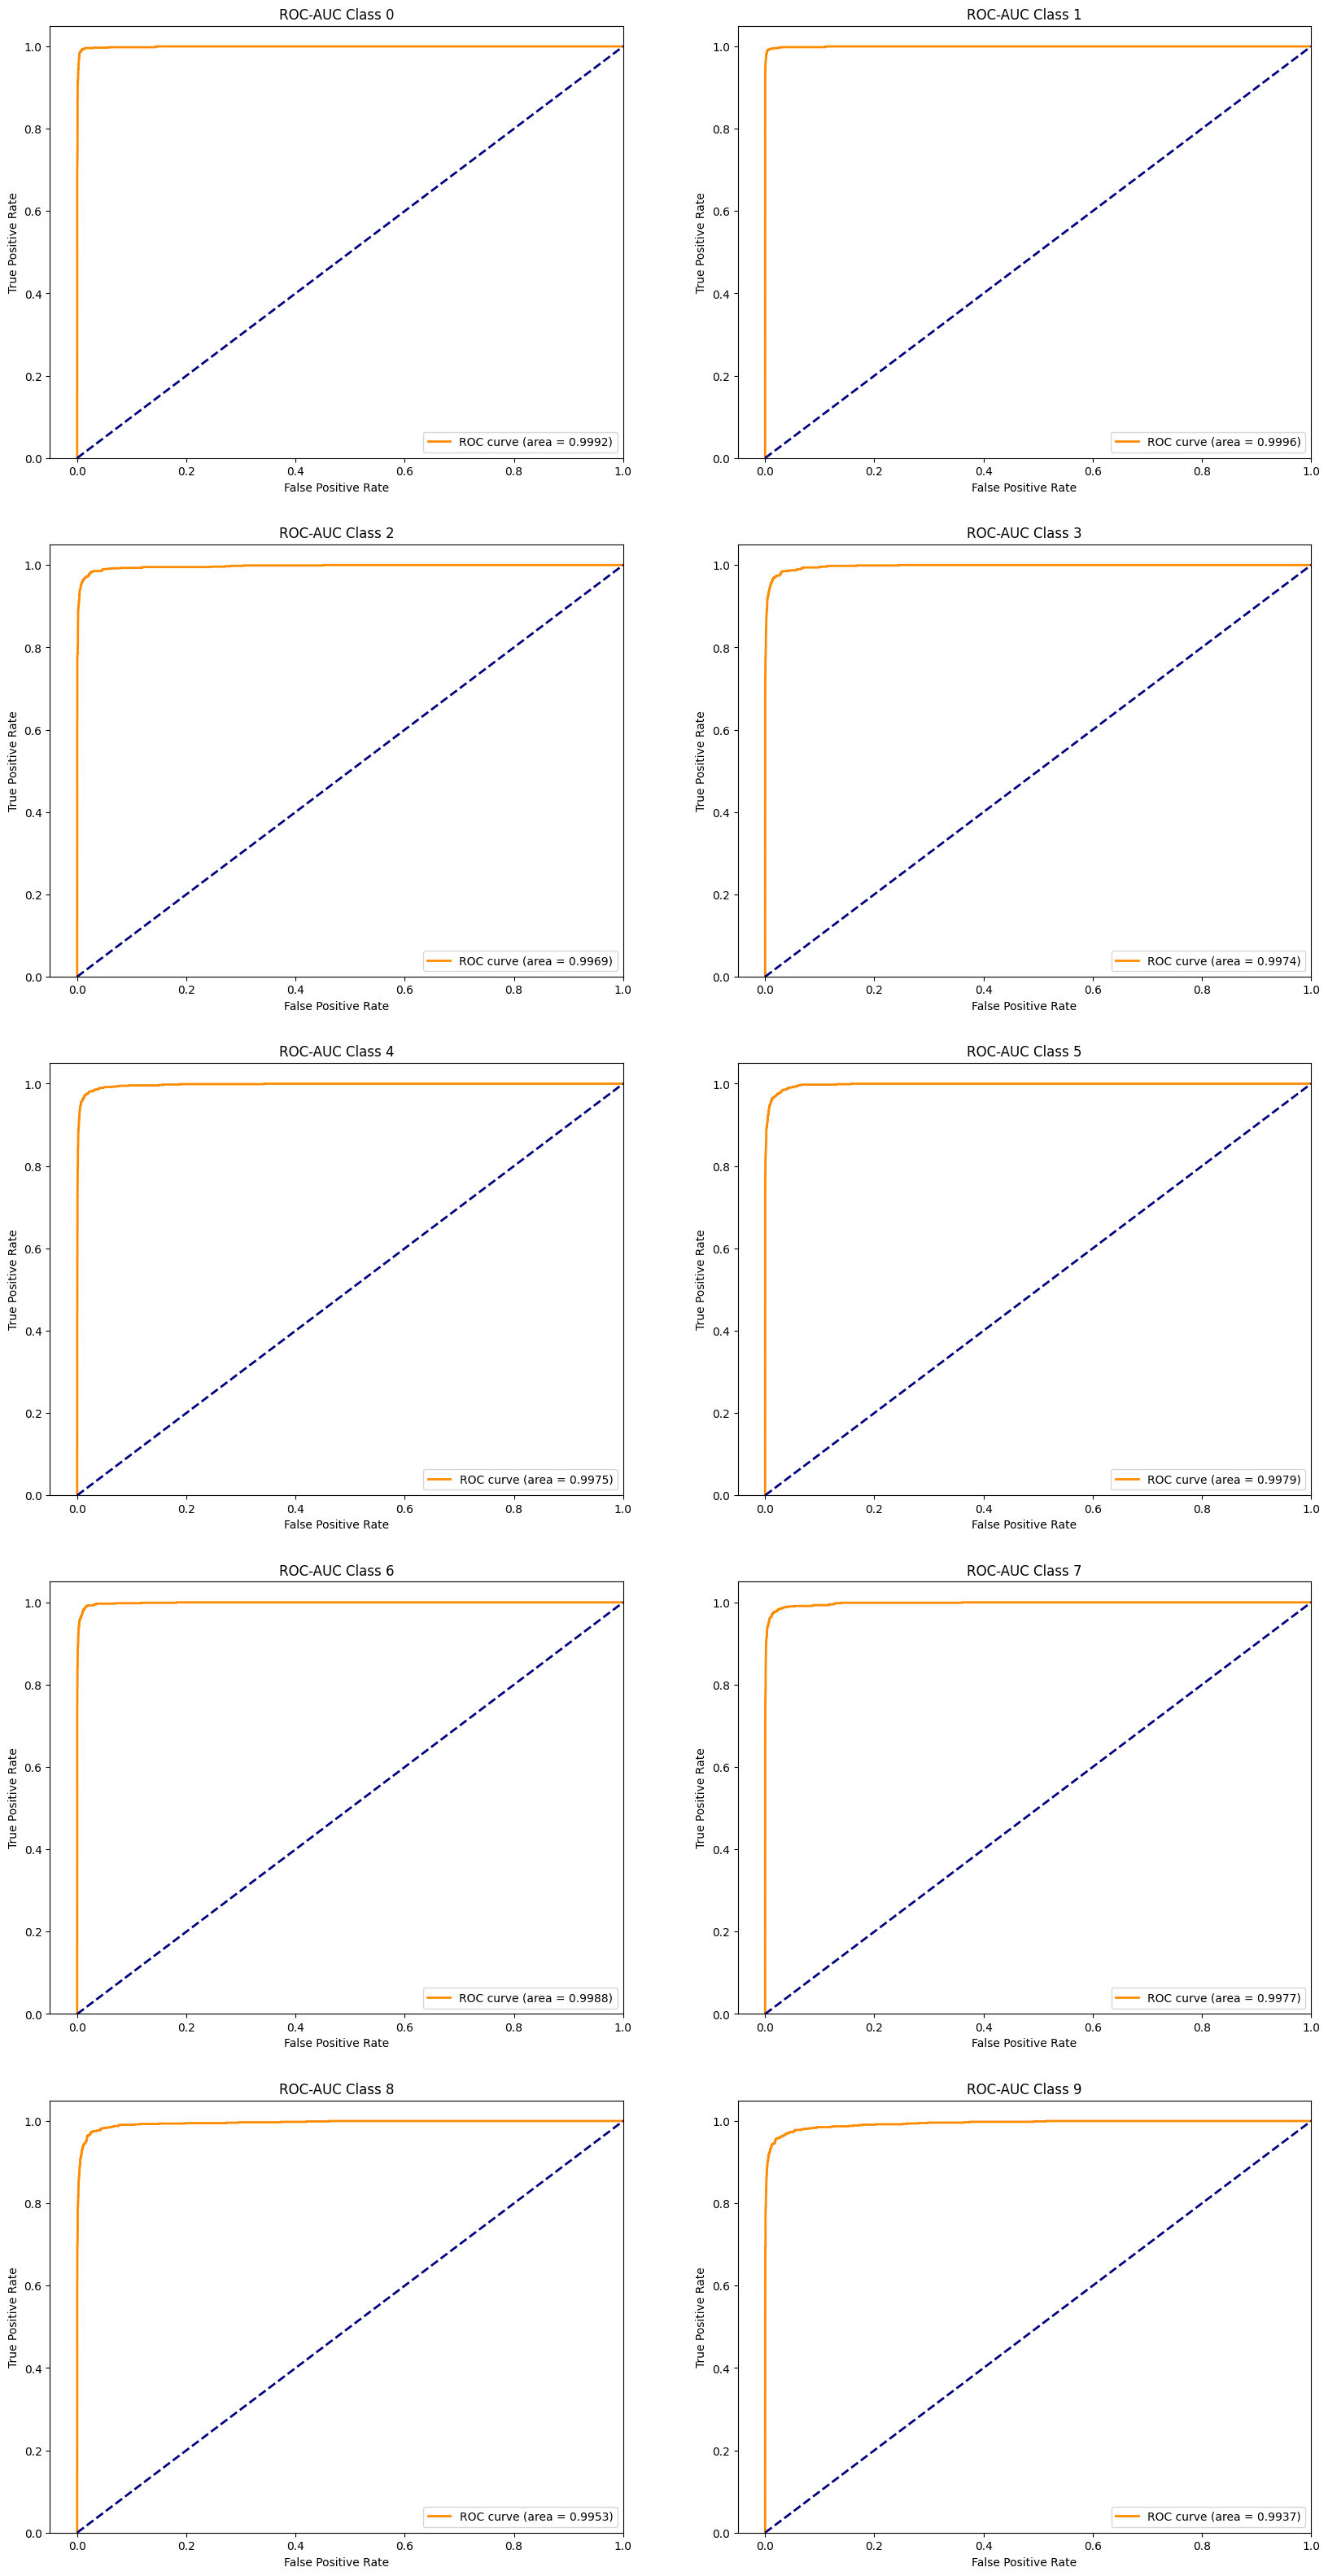

In [315]:
# ROC-AUC
roc_auc_results = roc_curve_multiclass(y_test, y_pred_proba)

plt.figure(figsize=(20, 40))

for cls, (roc_auc, fpr, tpr) in roc_auc_results.items():
    plt.subplot(5, 2, cls + 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Class {cls}')
    plt.legend(loc="lower right")

plt.show()